<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_012_visualization/sk_call_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Call data 병합 및 저장

## 공유한 call data id, call 파일 이름을 동기화 한다.

In [ ]:
# file_names = ["call_1908.csv", "call_1909.csv", "call_1910.csv", "call_1911.csv", "call_1912.csv", "call_2001.csv", "call_2002.csv", "call_2003.csv", "call_2004.csv", "call_2005.csv", "call_2006.csv", "call_2007.csv", "call_2008.csv", "call_2009.csv", "call_2010.csv", "call_2011.csv", "weahter_final.csv"]
# data_location = ["1AOYLpP9B6oUrlFz1S2B_-JlNXiwb2uLM", "1tSHjQ_Rf5H2dpLHtczVdKxX11avKovfL", "1gFPdMlf8tcxXMepm95I99SNRjjAlG3WQ", "1aqKZqEe8I8_rBB5ZP2aeJScu7rremoXG", "1l-_5WIDKx5f4JFMUg8SNM67foJJ6A6p6", "1wCnAcveLXq-v7oyAT3v3YRyCfsjkGtxG", "1EtbBjzwbCQ170yLQemp479z0TOZKHIOr", "1DBJTRHIPXmEpgas6kCwAYnnJ159sz9UV", "1mM-uhJtfNQ652Mo_r_eyE33RBnXl___h", "1IMTwqb3_jbFJ9XCYdkHkbewudG_FrNx9", "1AKkNRz-xt5aMqa_knBZ3XBznNoIsLAXL", "18xVBK0Rw1nPQfZaZ8Nzvt5gUphsbusyZ", "1IAMjjlFJ_B_3cHvaD-rKZfE0xU7TvDMy", "1bDNdRiKe14PcsMQi_jUwmBQAR0bxvio8", "15IBcX9TM11BEnHZ4qbdwLgN-Sus3oBVF", "1SIFkoM7twCSDzl6eqDKo-moe_FOGR8r6", "1g-7eeYV6ok3aOrsjNwF5oiugfYmeSZHn"]
file_names = ["call_1910.csv", "call_1911.csv", "call_1912.csv", "call_2001.csv", "call_2002.csv", "call_2003.csv", "call_2004.csv", "call_2005.csv", "call_2006.csv", "call_2007.csv", "call_2008.csv", "call_2009.csv", "call_2010.csv", "call_2011.csv", "weahter_final.csv"]
data_location = ["1gFPdMlf8tcxXMepm95I99SNRjjAlG3WQ", "1aqKZqEe8I8_rBB5ZP2aeJScu7rremoXG", "1l-_5WIDKx5f4JFMUg8SNM67foJJ6A6p6", "1wCnAcveLXq-v7oyAT3v3YRyCfsjkGtxG", "1EtbBjzwbCQ170yLQemp479z0TOZKHIOr", "1DBJTRHIPXmEpgas6kCwAYnnJ159sz9UV", "1mM-uhJtfNQ652Mo_r_eyE33RBnXl___h", "1IMTwqb3_jbFJ9XCYdkHkbewudG_FrNx9", "1AKkNRz-xt5aMqa_knBZ3XBznNoIsLAXL", "18xVBK0Rw1nPQfZaZ8Nzvt5gUphsbusyZ", "1IAMjjlFJ_B_3cHvaD-rKZfE0xU7TvDMy", "1bDNdRiKe14PcsMQi_jUwmBQAR0bxvio8", "15IBcX9TM11BEnHZ4qbdwLgN-Sus3oBVF", "1SIFkoM7twCSDzl6eqDKo-moe_FOGR8r6", "1g-7eeYV6ok3aOrsjNwF5oiugfYmeSZHn"]

files = [(file_names[x], data_location[x]) for x in range(len(file_names))]
calls = files[:-1]
weather = files[-1]

## 여러 개의 파일을 하나의 pandas.DataFrame으로 만드는 함수

In [ ]:
import pandas as pd

def downloadUrl(id):
  return f"https://drive.google.com/uc?id={id}&authuser=0&export=download"

def accumulateDataFrame(acc_df: pd.DataFrame, doc_ids: []) -> pd.DataFrame:
  if type(doc_ids) != list:  # list 형태로 만들어서 입력받아야 함.
    print("구글 ID를 모은 `리스트`가 필요합니다. ex) [ids]")
    return

  for name, id in doc_ids:  # doc_ids file 다운로드 및 append 작업
  # 총 세 단계
    acc_df = acc_df.append(pd.read_csv(downloadUrl(id)),
                           ignore_index=True)

  return acc_df.copy()  # 복사본을 만들어 반환한다.

## column 정의 및 함수 실행으로 DataFrame 생성

In [ ]:
init_df = pd.DataFrame(data=None, columns=['일자(YYYYMMDD)', '연령', '성별', 
                                      '발신지(시도)', '발신지(시군구)', 
                                      '대분류', '중분류', 
                                      '통화비율(시군구내)'])
init_df = accumulateDataFrame(init_df, calls)

In [ ]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7816633 entries, 0 to 7816632
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   일자(YYYYMMDD)  object 
 1   연령            object 
 2   성별            object 
 3   발신지(시도)       object 
 4   발신지(시군구)      object 
 5   대분류           object 
 6   중분류           object 
 7   통화비율(시군구내)    float64
dtypes: float64(1), object(7)
memory usage: 477.1+ MB


## `.`으로 표시된 세종특별자치시 수정

In [ ]:
init_df['발신지(시군구)'] = init_df['발신지(시군구)'].map(lambda x: '세종특별자치시' if x == '.' else x)

## 하나의 파일 저장

- 영구로 저장할 위치
- 자유롭게 호출할 원본 파일의 위치

In [ ]:
filename = 'call.csv'
init_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/data/data/callAnalysis/{filename}', index=False)
init_df.to_csv(f'/content/{filename}', index=False)

In [ ]:
init_df.head()

,일자(YYYYMMDD),연령,성별,발신지(시도),발신지(시군구),대분류,중분류,통화비율(시군구내)
0,20191001,40,남성,강원,강릉시,쇼핑,정보통신기기,0.0001
1,20191001,50,남성,강원,강릉시,의료편의,의료시설,0.0002
2,20191001,40,여성,강원,강릉시,음식점,중식,0.0001
3,20191001,40,남성,강원,강릉시,교통편의,자동차시설,0.0004
4,20191001,30,여성,강원,강릉시,의료편의,의료시설,0.0003


In [ ]:
del init_df

# [새로운 시작] 데이터 로드

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

plt.rc('font', family='NanumBarunGothic') 


def get_file(x):
  return f'/content/drive/MyDrive/Colab Notebooks/data/data/callAnalysis/{x}'
  
origin_df = pd.read_csv(get_file('call.csv'))

In [2]:
df = origin_df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7816633 entries, 0 to 7816632
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   일자(YYYYMMDD)  int64  
 1   연령            int64  
 2   성별            object 
 3   발신지(시도)       object 
 4   발신지(시군구)      object 
 5   대분류           object 
 6   중분류           object 
 7   통화비율(시군구내)    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 477.1+ MB


In [4]:
df.head(1)

,일자(YYYYMMDD),연령,성별,발신지(시도),발신지(시군구),대분류,중분류,통화비율(시군구내)
0,20191001,40,남성,강원,강릉시,쇼핑,정보통신기기,0.0001


## 두 개로 나누어진 지역 합치기

In [5]:
df.insert(3, '발신지', df['발신지(시도)'] + " " + df['발신지(시군구)'])

In [6]:
df.drop(columns=['발신지(시도)', '발신지(시군구)'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7816633 entries, 0 to 7816632
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   일자(YYYYMMDD)  int64  
 1   연령            int64  
 2   성별            object 
 3   발신지           object 
 4   대분류           object 
 5   중분류           object 
 6   통화비율(시군구내)    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 417.5+ MB


## 대분류 종류 확인하기

In [8]:
for group, row in df.groupby('대분류'):
  print(group)
  print("-"*100)

건물/시설
----------------------------------------------------------------------------------------------------
공공편의
----------------------------------------------------------------------------------------------------
교육/학문
----------------------------------------------------------------------------------------------------
교통편의
----------------------------------------------------------------------------------------------------
금융편의
----------------------------------------------------------------------------------------------------
기업/단체
----------------------------------------------------------------------------------------------------
생활편의
----------------------------------------------------------------------------------------------------
서비스산업
----------------------------------------------------------------------------------------------------
쇼핑
----------------------------------------------------------------------------------------------------
스포츠/레저
-------------------------------------

In [9]:
대분류 = df.groupby('대분류')
대분류.get_group('금융편의')

,일자(YYYYMMDD),연령,성별,발신지,대분류,중분류,통화비율(시군구내)
5,20191001,50,남성,강원 강릉시,금융편의,제2금융,0.0004
11,20191001,40,여성,강원 강릉시,금융편의,제2금융,0.0007
15,20191001,50,여성,강원 강릉시,금융편의,제2금융,0.0007
22,20191001,40,남성,강원 강릉시,금융편의,제2금융,0.0006
23,20191001,40,남성,강원 강릉시,금융편의,주요금융,0.0003
...,...,...,...,...,...,...,...
7816618,20201118,30,남성,충북 청주시,금융편의,주요금융,0.0002
7816625,20201108,60,여성,충북 청주시,금융편의,주요금융,0.0001
7816627,20201130,20,남성,충북 청주시,금융편의,주요금융,0.0001
7816628,20201126,30,여성,충북 청주시,금융편의,제2금융,0.0004


# **시각화** 시작

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

## 시각화 countplot 공통 함수

In [10]:
def common_count(inner_df, **kwargs):
  print(kwargs)
  f, ax = plt.subplots(figsize=(17, 7))
  plt.xticks(rotation=kwargs['rotate'])
  ax.set_title(kwargs['title'],
              fontsize=33, 
              fontweight='bold')

  sns.countplot(x=kwargs['x'], y=kwargs['y'], data=inner_df, ax=ax)

## 대분류

### 통화가 많이 걸린 대분류 분포도

{'x': '대분류', 'y': None, 'title': '중분류 분포도', 'rotate': 45}


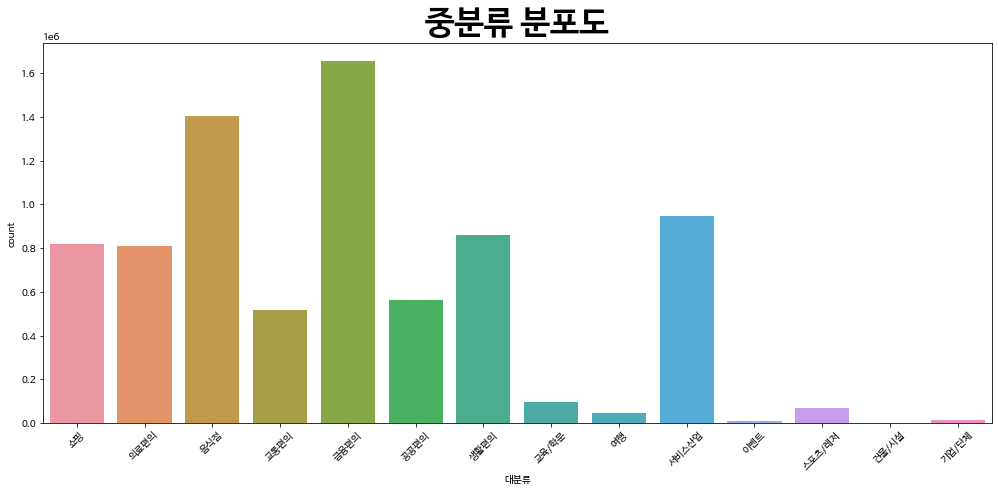

In [11]:
kargs = {
    'x': '대분류',
    'y': None,
    'title': '중분류 분포도',
    'rotate': 45
}
common_count(df, **kargs)

In [12]:
pd.DataFrame(df.loc[:, ['대분류']].value_counts()).reset_index()

,대분류,0
0,금융편의,1656807
1,음식점,1403663
2,서비스산업,944989
3,생활편의,858032
4,쇼핑,819521
5,의료편의,811732
6,공공편의,564877
7,교통편의,518729
8,교육/학문,97677
9,스포츠/레저,70033


## 금융편의 > 중분류

### 중분류 전체 카테고리 분포도

{'x': '중분류', 'y': None, 'title': '중분류 분포도', 'rotate': 90}


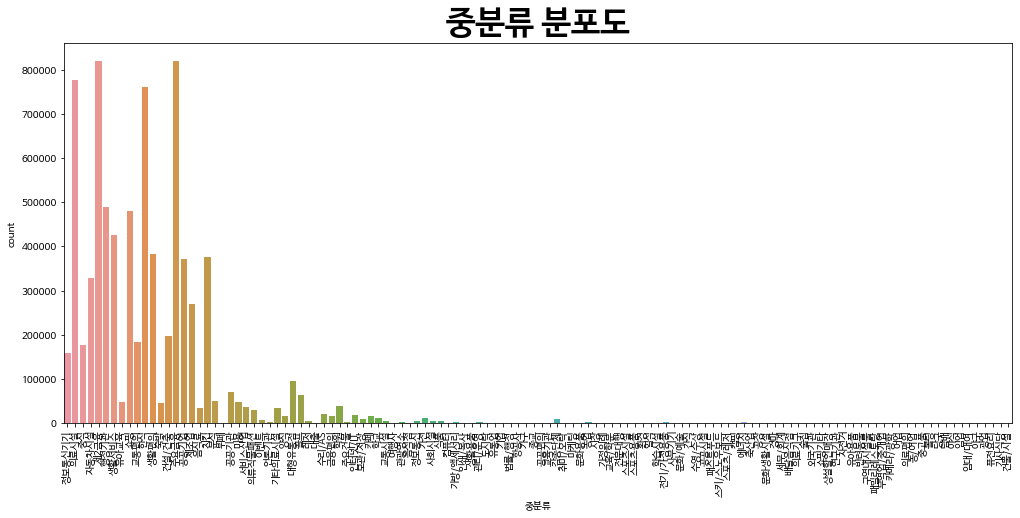

In [13]:
kargs = {
    'x': '중분류',
    'y': None,
    'title': '중분류 분포도',
    'rotate': 90
}
common_count(df, **kargs)

### 중분류 sorting

In [14]:
sorting = df.groupby('중분류').count().reset_index().sort_values(by='통화비율(시군구내)', ascending=False).reset_index()
sorting

,index,중분류,일자(YYYYMMDD),연령,성별,발신지,대분류,통화비율(시군구내)
0,98,제2금융,820110,820110,820110,820110,820110,820110
1,102,주요금융,819897,819897,819897,819897,819897,819897
2,83,의료시설,776318,776318,776318,776318,776318,776318
3,118,한식,760678,760678,760678,760678,760678,760678
4,120,행정기관,489768,489768,489768,489768,489768,489768
...,...,...,...,...,...,...,...,...
117,91,임업,1,1,1,1,1,1
118,90,임대/대여,1,1,1,1,1,1
119,17,광업,1,1,1,1,1,1
120,114,퓨전요리,1,1,1,1,1,1


### TOP 3

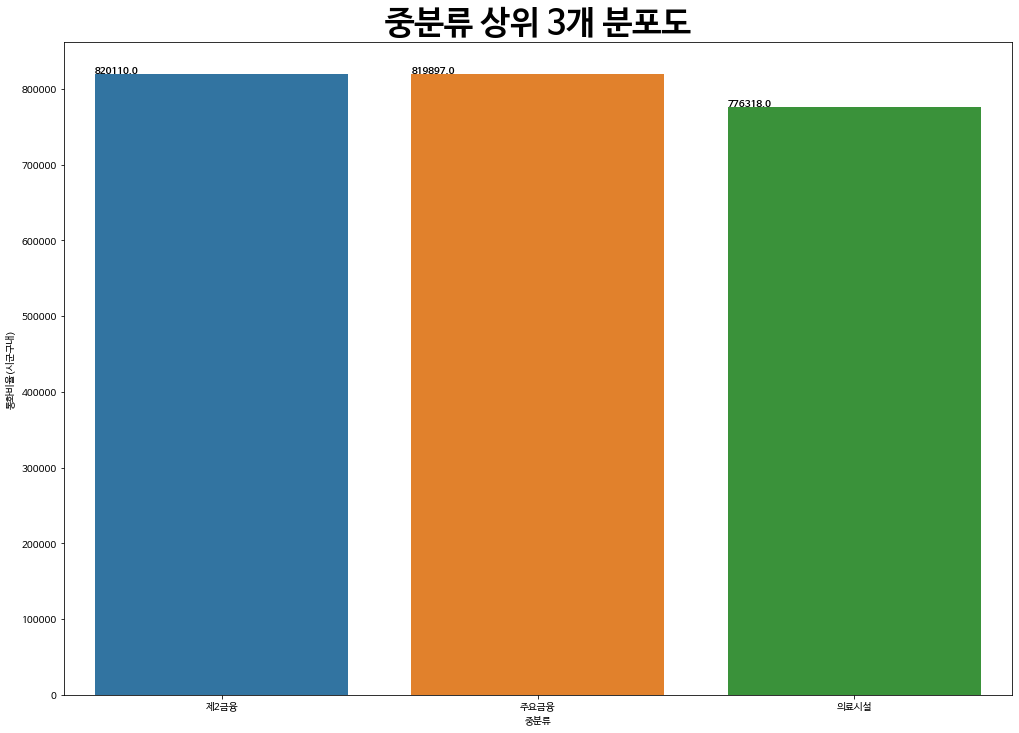

In [15]:
top_n = sorting.iloc[:3]

f, ax = plt.subplots(figsize=(17, 12))
# plt.xticks(rotation=90)

sns.barplot(data=top_n, x='중분류', y='통화비율(시군구내)', ax=ax)

ax.set_title('중분류 상위 3개 분포도',
             fontsize=33,
             fontweight='bold')
ax.set_xticklabels(top_n['중분류'])

for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x(), p.get_height() + 1), fontweight='bold')

del top_n

### TOP 10 ~ 20

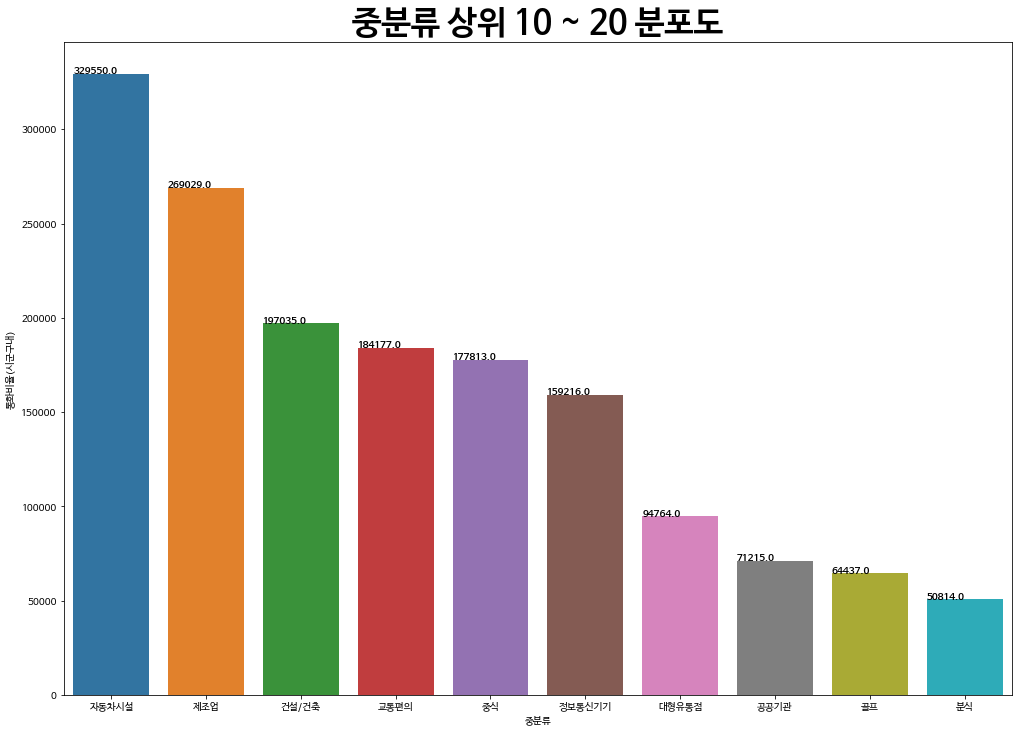

In [16]:
top_n = sorting.iloc[10:20].copy()

f, ax = plt.subplots(figsize=(17, 12))
# plt.xticks(rotation=90)

sns.barplot(data=top_n, x='중분류', y='통화비율(시군구내)', ax=ax)

ax.set_title('중분류 상위 10 ~ 20 분포도',
             fontsize=33,
             fontweight='bold')
ax.set_xticklabels(top_n['중분류'])

for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x(), p.get_height() + 1), fontweight='bold')

del top_n

### BOTTOM 100

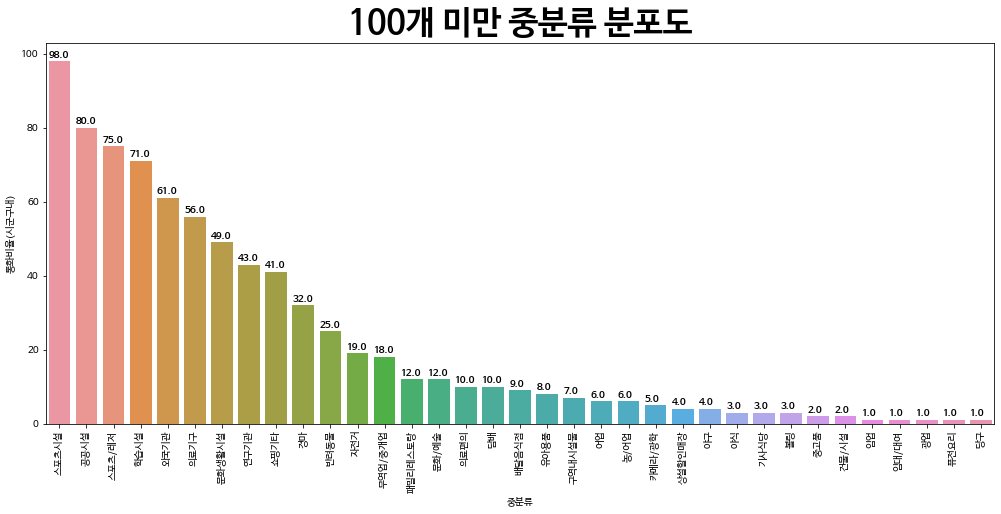

In [17]:
top_n = sorting[sorting['통화비율(시군구내)'] < 100]

f, ax = plt.subplots(figsize=(17, 7))
plt.xticks(rotation=90)
ax.set_title('100개 미만 중분류 분포도',
             fontsize=33,
             fontweight='bold')
ax.set_xticklabels(top_n['중분류'])

sns.barplot(data=top_n, x='중분류', y='통화비율(시군구내)', ax=ax)

for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x(), p.get_height() + 1), fontweight='bold')

del top_n

## 금융편의(`금융권`)에 전화한 지역

### 가장 많은 통화가 발생한 지역

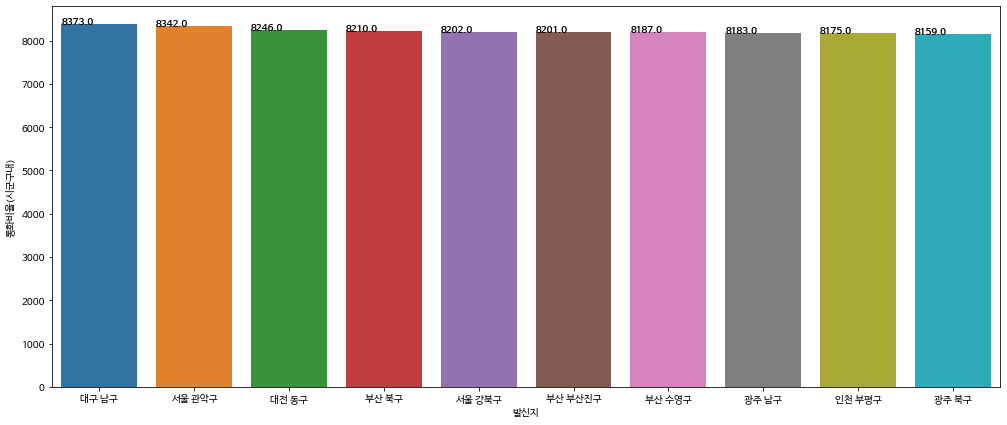

In [30]:
top_n = df.groupby('대분류').get_group('금융편의').groupby('발신지').count().reset_index().sort_values(by='통화비율(시군구내)', ascending=False).iloc[:10, ]


f, ax = plt.subplots(figsize=(17, 7))
# plt.xticks(rotation=90)

ax.set_title('',
             fontsize=33,
             fontweight='bold')
ax.set_xticklabels(top_n['중분류'])

sns.barplot(data=top_n, x='발신지', y='통화비율(시군구내)', ax=ax)

for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x(), p.get_height() + 1), fontweight='bold')

del top_n

## 각 연령 및 성별 금융권 통화량

### 지역 countplot 공통 함수

In [65]:
def common_count_location(inner_df, **kwargs):
  print(kwargs)
  f, ax = plt.subplots(figsize=(17, 7))
  plt.xticks(rotation=kwargs['rotate'])
  ax.set_title(kwargs['title'],
              fontsize=33, 
              fontweight='bold')

  sns.countplot(x=kwargs['x'], y=kwargs['y'], data=inner_df, hue=kwargs['hue'], ax=ax)

  for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height() + 1), fontweight='bold')


#### 대구 남구

{'x': '연령', 'y': None, 'location': '대구 남구', 'title': '대구 남구 연령별 통화 분포도', 'hue': '중분류', 'rotate': 0}


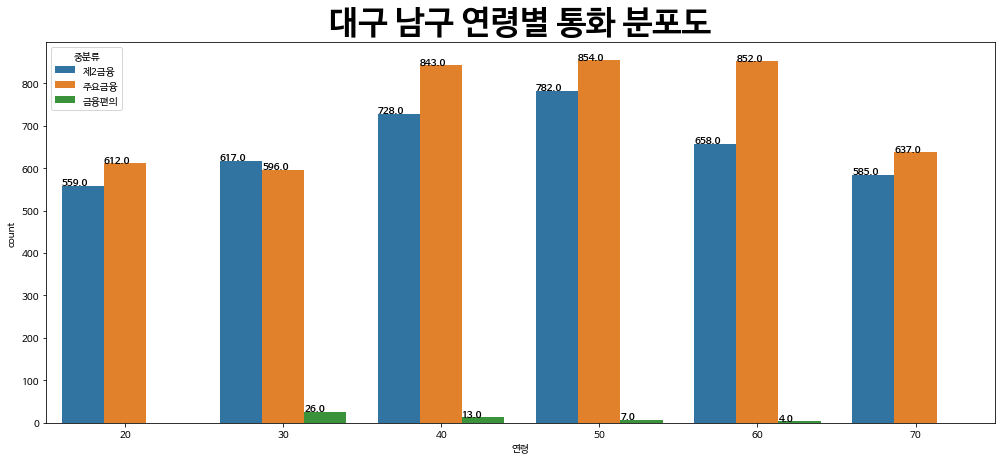

In [67]:
target_location = '대구 남구'
top_n = df.groupby('발신지').get_group(target_location).groupby('대분류').get_group('금융편의').sort_values('통화비율(시군구내)', ascending=False)

kargs = {
    'x': '연령',
    'y': None,
    'location': target_location,
    'title': '{} 연령별 통화 분포도'.format(target_location),
    'hue': '중분류',
    'rotate': 0
}

common_count_location(top_n, **kargs)

#### 서울 관악구 


{'x': '연령', 'y': None, 'title': '서울 관악구 연령별 통화 분포도', 'hue': '중분류', 'rotate': 0}


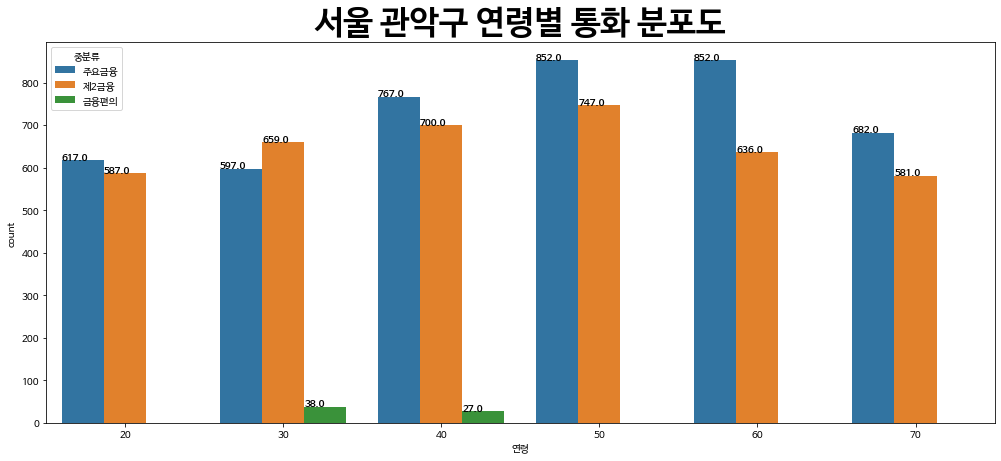

In [64]:
top_n = df.groupby('발신지').get_group('서울 관악구').groupby('대분류').get_group('금융편의').sort_values('통화비율(시군구내)', ascending=False)

kargs = {
    'x': '연령',
    'y': None,
    'title': '서울 관악구 연령별 통화 분포도',
    'hue': '중분류',
    'rotate': 0
}

common_count_location(top_n, **kargs)

del top_n

#### 대전 동구

{'x': '연령', 'y': None, 'location': '대전 동구', 'title': '대전 동구 연령별 금융권 통화 분포도', 'hue': '중분류', 'rotate': 0}


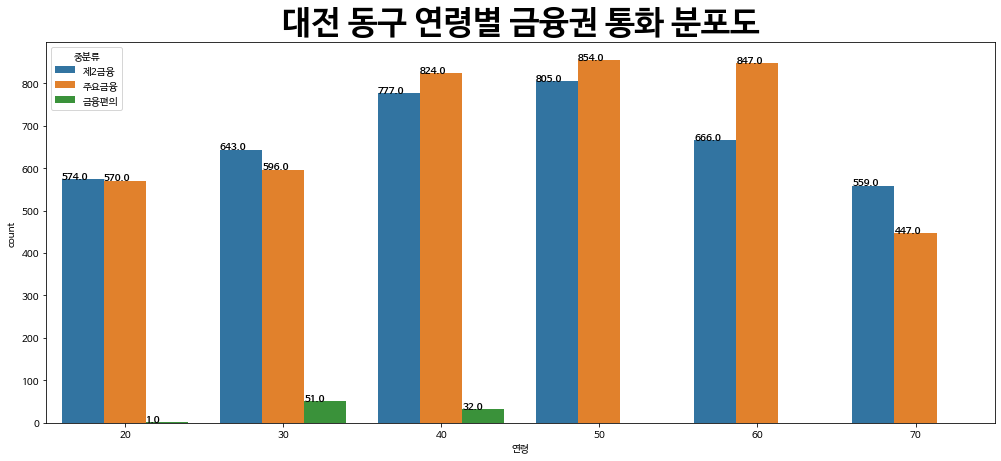

In [74]:
target_location = '대전 동구'
top_n = df.groupby('발신지').get_group(target_location).groupby('대분류').get_group('금융편의').sort_values('통화비율(시군구내)', ascending=False)

kargs = {
    'x': '연령',
    'y': None,
    'location': target_location,
    'title': '{} 연령별 금융권 통화 분포도'.format(target_location),
    'hue': '중분류',
    'rotate': 0
}

common_count_location(top_n, **kargs)

#### 4위 ~ 10위 공통 함수

In [72]:
def visit_countplots(locations):
  for location in locations:
    target_location = location
    top_n = df.groupby('발신지').get_group(target_location).groupby('대분류').get_group('금융편의').sort_values('통화비율(시군구내)', ascending=False)

    kargs = {
        'x': '연령',
        'y': None,
        'location': target_location,
        'title': '{} 연령별 금융권 통화 분포도'.format(target_location),
        'hue': '중분류',
        'rotate': 0
    }

    common_count_location(top_n, **kargs)

##### 4위부터 10위까지 시각화

- 부산 북구
- 서울 강북구
- 부산 부산진구
- 부산 영수구
- 광주 남구
- 인천 부평구
- 광주 북구

{'x': '연령', 'y': None, 'location': '부산 북구', 'title': '부산 북구 연령별 금융권 통화 분포도', 'hue': '중분류', 'rotate': 0}
{'x': '연령', 'y': None, 'location': '서울 강북구', 'title': '서울 강북구 연령별 금융권 통화 분포도', 'hue': '중분류', 'rotate': 0}
{'x': '연령', 'y': None, 'location': '부산 부산진구', 'title': '부산 부산진구 연령별 금융권 통화 분포도', 'hue': '중분류', 'rotate': 0}
{'x': '연령', 'y': None, 'location': '부산 수영구', 'title': '부산 수영구 연령별 금융권 통화 분포도', 'hue': '중분류', 'rotate': 0}
{'x': '연령', 'y': None, 'location': '광주 남구', 'title': '광주 남구 연령별 금융권 통화 분포도', 'hue': '중분류', 'rotate': 0}
{'x': '연령', 'y': None, 'location': '인천 부평구', 'title': '인천 부평구 연령별 금융권 통화 분포도', 'hue': '중분류', 'rotate': 0}
{'x': '연령', 'y': None, 'location': '광주 북구', 'title': '광주 북구 연령별 금융권 통화 분포도', 'hue': '중분류', 'rotate': 0}


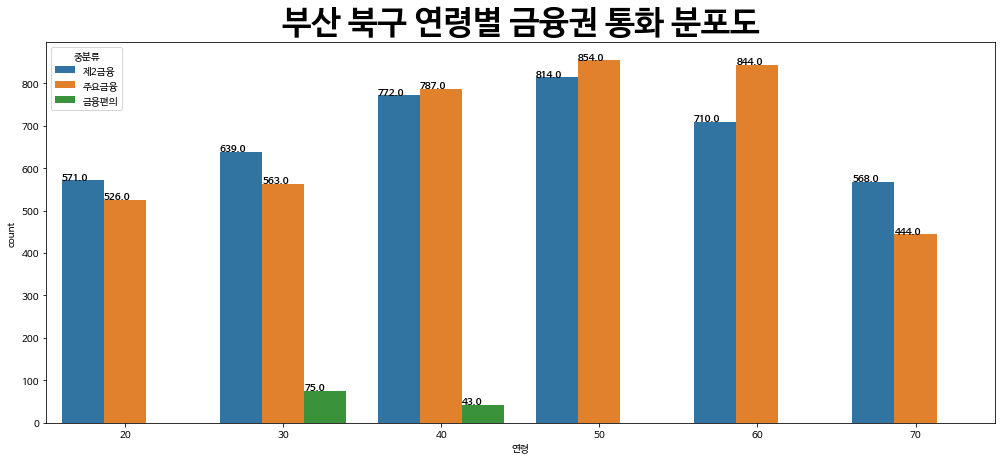

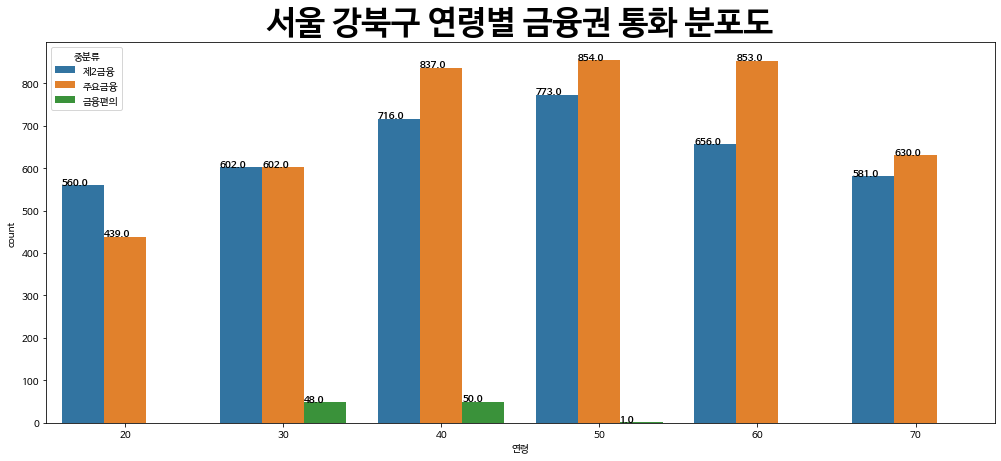

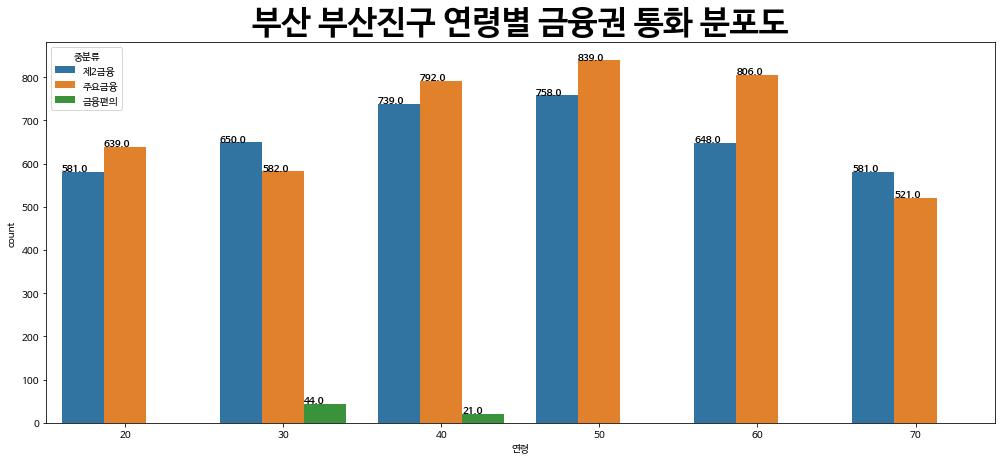

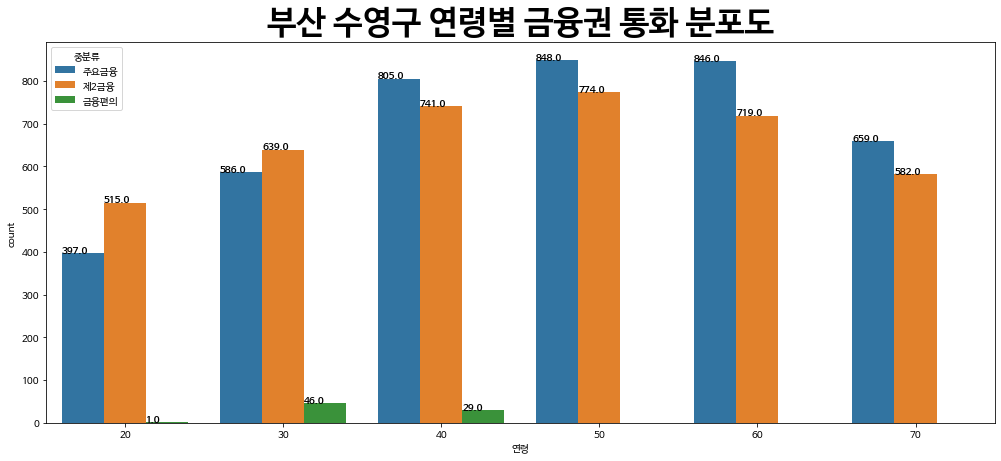

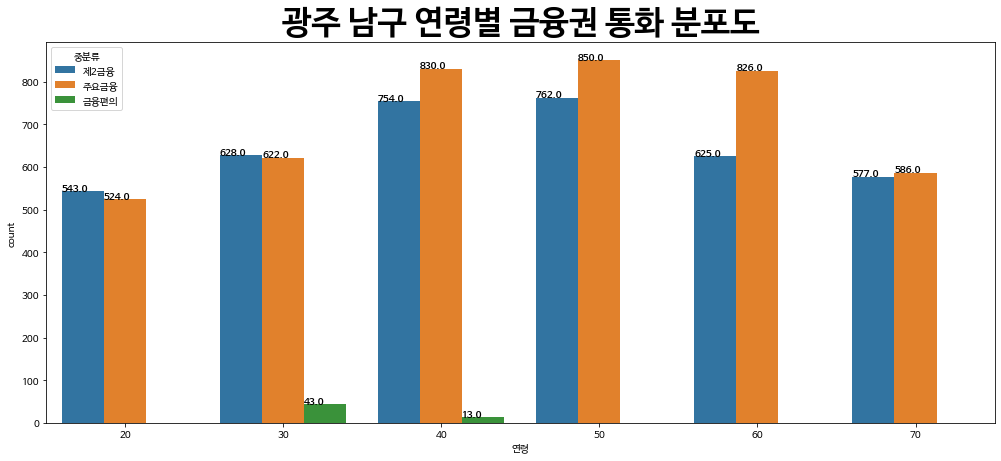

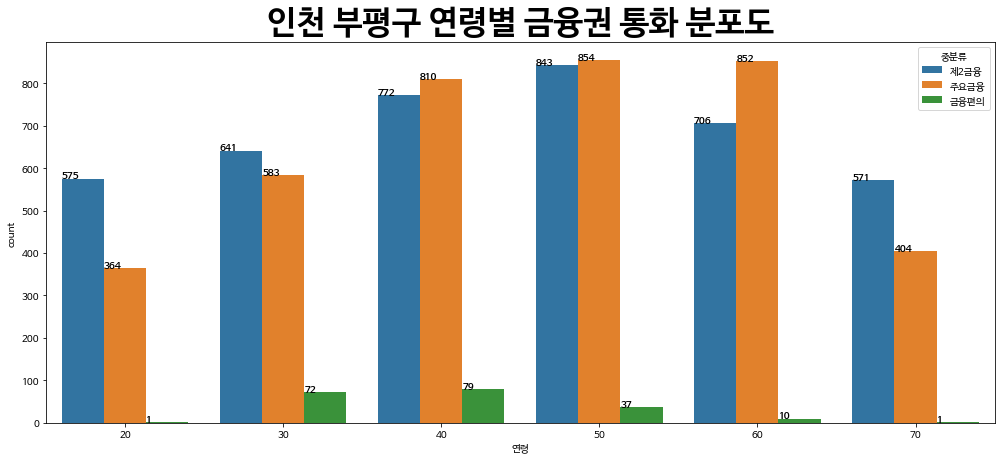

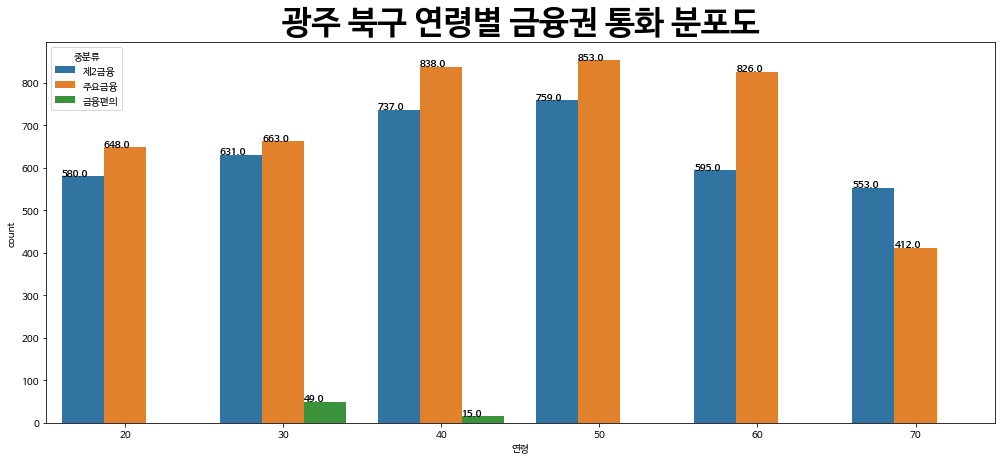

In [73]:
visit_countplots(['부산 북구', '서울 강북구', '부산 부산진구', '부산 수영구',
       '광주 남구', '인천 부평구', '광주 북구'])

In [42]:
top_n['발신지'].unique()

array(['대구 남구', '서울 관악구', '대전 동구', '부산 북구', '서울 강북구', '부산 부산진구', '부산 수영구',
       '광주 남구', '인천 부평구', '광주 북구'], dtype=object)